# Logistic Regression

### Using Perceptron Trick

In [2]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [81]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                       random_state=41, hypercube=False, class_sep=10)

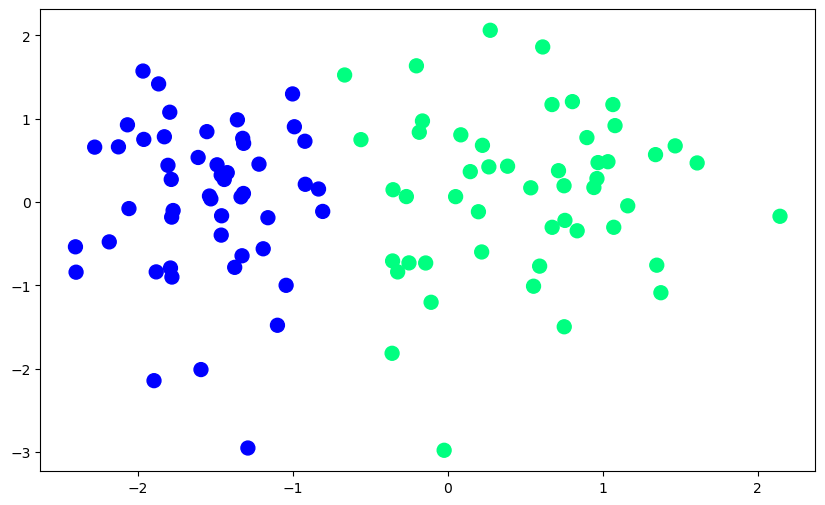

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)

In [82]:
class LGRegression:
    
    def __init__(self, learning_rate = 0.01, epochs = 1000):
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def perceptron(self, X, y):
        
        X = np.insert(X, 0, 1, axis=1)
        weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            j = np.random.randint(0, X.shape[0])
            y_hat = self.step(np.dot(weights, X[j]))
            weights = weights + self.learning_rate * (y[j] - y_hat) * X[j]
             
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]
        
    
    def step(self, z):
        return 1 if z > 0 else 0

In [75]:
reg = LGRegression(learning_rate=0.1)

In [76]:
reg.perceptron(X, y)

In [62]:
reg.intercept_ , reg.coef_

(1.0, array([1.31188865, 0.15512307]))

In [43]:
from sklearn.linear_model import LogisticRegression
 
model=LogisticRegression()
 
#Model fitting
model.fit(X, y)

model.intercept_, model.coef_

(array([2.25256402]), array([[3.50204668, 0.02749943]]))

In [63]:
m = -(reg.coef_[0]/reg.coef_[1])
b = -(reg.intercept_/reg.coef_[1])

In [44]:
m = -(model.coef_[:,0]/model.coef_[:, 1])
b = -(model.intercept_[0]/model.coef_[:, 1])

In [64]:
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

In [34]:
np.linspace(-3, 3, 100)

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

(-3.0, 2.0)

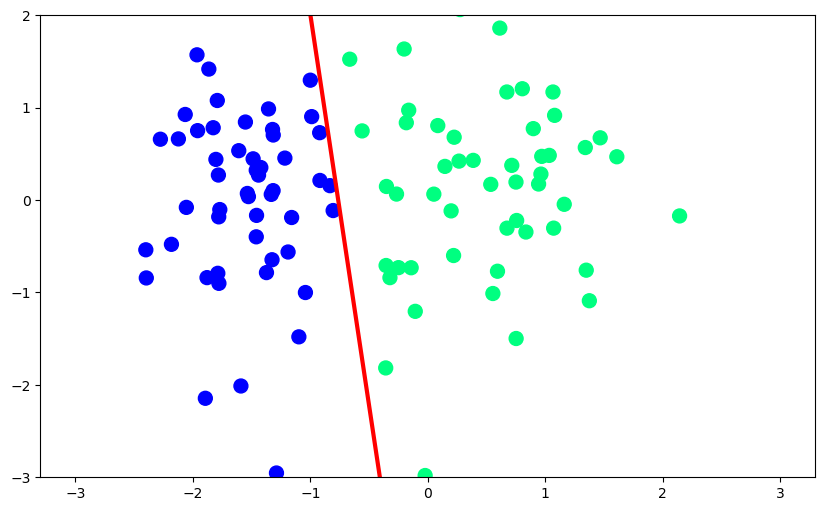

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="red", linewidth=3)
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)
plt.ylim(-3, 2)

In [93]:
# Just for Experminet

X_train = np.array([[2, 6],[ 4, 5], [7, 6]])
y_train = np.array([0, 1, 1])

X_train
ex = LGRegression(learning_rate=0.1)
ex.perceptron(X_train, y_train)

ex.intercept_, ex.coef_

lgx = LogisticRegression()

lgx.fit(X_train, y_train)

lgx.intercept_, lgx.coef_

(array([-0.71076251]), array([[ 0.76391047, -0.26714463]]))

## Use of Sigmoid Function

In [94]:
from sklearn.datasets import make_classification
import numpy as np

In [95]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                       random_state=41, hypercube=False, class_sep=30)

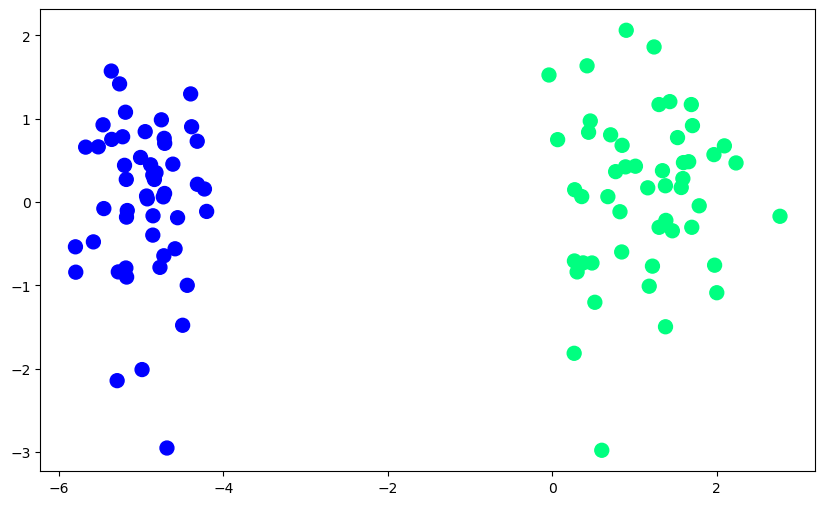

In [96]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)

In [97]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [98]:
def perceptron(X, y):
    
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = sigmoid(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
    return weights[0], weights[1:]


In [99]:
intercept_, coef_  = perceptron(X, y)

In [100]:
intercept_, coef_

(2.58721130450859, array([2.32674284, 0.18980024]))

In [102]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

(-3.0, 2.0)

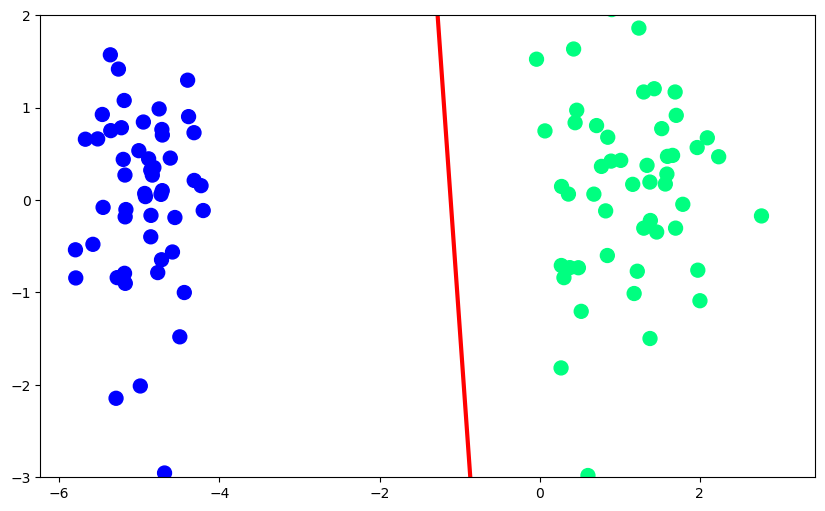

In [103]:
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="red", linewidth=3)
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)
plt.ylim(-3, 2)

# Creating Own Logistic regression 

In [104]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2, n_clusters_per_class=1,
                       random_state=41, hypercube=False, class_sep=30)

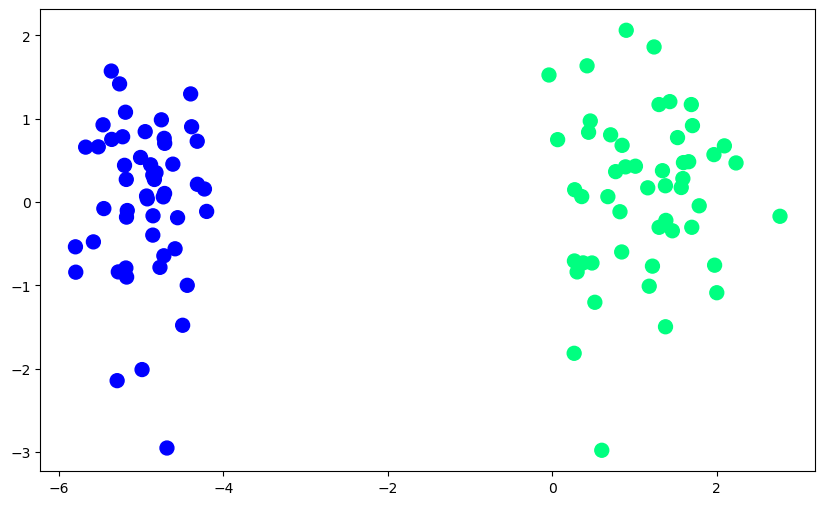

In [105]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)

In [109]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(solver='sag')
lor.fit(X, y)


LogisticRegression(solver='sag')

In [110]:
lor.intercept_, lor.coef_

(array([3.52899148]), array([[1.76965557, 0.01259423]]))

In [112]:
m = -(lor.coef_[:,0]/lor.coef_[:,1])
b = -(lor.intercept_/lor.coef_[:,1])

(-3.0, 2.0)

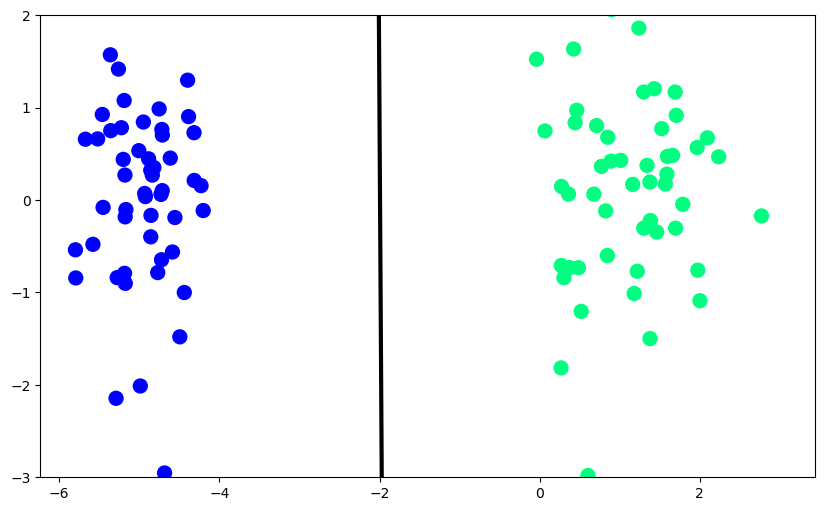

In [114]:
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="black", linewidth=3)
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)
plt.ylim(-3, 2)

In [120]:
class LGGDRegression:
    
    def __init__(self, learning_rate=0.01, epochs = 1000):
        self.intercept_ = None
        self.coef_ = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        
    def fit(self, X, y):
        
        X = np.insert(X, 0, 1, axis=1)
        weights = np.ones(X.shape[1])
        
        for i in range(self.epochs):
            y_hat = self.sigmoid(np.dot(X, weights))
            weights = weights + self.learning_rate * (np.dot((y-y_hat),X)/X.shape[0])
            
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]
            
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))

In [133]:
reg = LGGDRegression(learning_rate=0.5, epochs=5000)

In [134]:
reg.fit(X, y)

In [135]:
reg.intercept_, reg.coef_

(5.102916648814875, array([3.47974267, 0.13305072]))

In [136]:
m = -(reg.coef_[0]/reg.coef_[1])
b = -(reg.intercept_/reg.coef_[1])

(-3.0, 2.0)

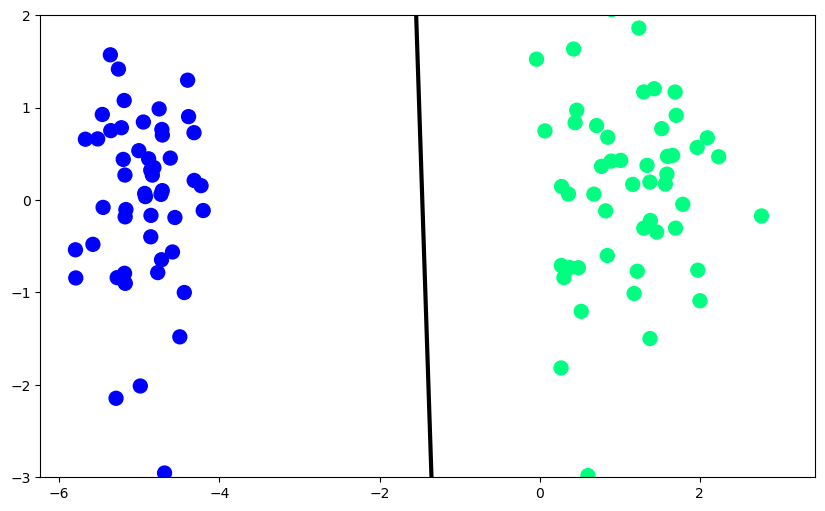

In [137]:
X_input = np.linspace(-3, 3, 100)
y_input = m * X_input + b

plt.figure(figsize=(10, 6))
plt.plot(X_input, y_input, color="black", linewidth=3)
plt.scatter(X[:,0], X[:, 1], c=y , cmap='winter', s=100)
plt.ylim(-3, 2)